# Importing modules

In [7]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
%matplotlib inline

# Model parameters

In [5]:
ms = 50.0      # weight of the rocket shell [kg]
g = 9.81       # acceleration by gravity [m/s**2]
rho = 1.091    # average air density [kg/m**3]
r = 0.5        # radius of the rocket shell [m]
A = np.pi*r**2 # maximum crossection area of the rocket [m**2]
ve = 325       # exhaust speed [m/s]
C_D = 0.15     # drag coefficient
mpo = 100      # initial weight of the rocket propellant [kg]

In [10]:
def dmpdt_func(t):
    if t < 5:
        dmpdt = 20 # burn rate [kg/s]
    else:
        dmpdt = 0  # burn rate [kg/s]
        
    return dmpdt

# Right hand side function

In [28]:
def f(u, t):
    h = u[0]
    v = u[1]
    
    mp = mpo - integrate.quad(dmpdt_func, 0, t)[0]
    dmpdt = dmpdt_func(t)
    return np.array([v,
                    -g + dmpdt*ve/(ms+mp)-0.5*rho*v*np.abs(v)*A*C_D/(ms+mp)])

# Euler's method

In [29]:
def euler_step(u, f, t, dt):
    return u + dt*f(u, t)

In [30]:
h0 = 0
v0 = 0
ics = np.array([h0, v0])

In [31]:
T = 100
dt = 0.1
N = int(T/dt)+1
t = np.linspace(0, T, N)

In [32]:
u = np.empty((N, 2))
u[0] = ics

In [33]:
for n in range(N-1):
    u[n+1] = euler_step(u[n], f, t[n], dt)

In [39]:
idx_negative = np.where(u[:,0]<0)[0][0]
h = u[:idx_negative]
t = t[:idx_negative]

(0, 37.0)

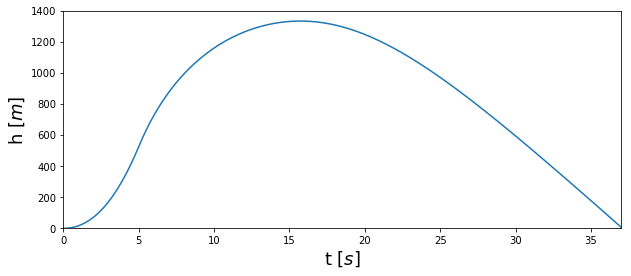

In [42]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(t, h[:,0])
ax.set_ylabel('h $[m]$', fontsize=18)
ax.set_xlabel('t $[s]$', fontsize=18)
ax.set_ylim(0, 1400)
ax.set_xlim(0, t.max())

In [43]:
# remaining mas of rocket propellant at t=3.2 s
mpo - integrate.quad(dmpdt_func, 0, 3.2)[0]

36.0

In [50]:
# maximum velocity
v = h[:,1]
t[np.where(v == v.max())[0][0]]
u[np.where(v == v.max())[0][0],0]

523.52283429184763

In [51]:
u[:,0].max()

1334.1829178826654

In [54]:
t[np.where(u[:,0]==u[:,0].max())[0][0]]

15.700000000000001

In [55]:
t[-1]

37.0

In [56]:
h[-1,1]

-85.977116248833894

In [62]:
True > False

True